<a href="https://colab.research.google.com/github/parthpendal/Projects---Data-Analysis-and-Machine-Learning/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd


Merging 12 months of data into a single dataframe

In [122]:
df=pd.concat(
            [
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_August_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_September_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_October_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_November_2019.csv"),
             pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_December_2019.csv"),
            ]
             )
df.shape

(186850, 6)

# To read all the files in the directory below code can be used.
# import os
# files=[file for files in os.listdir('./sales data')]
# df=pd.concat(files) 

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Question 1: What was best month for sales? How much was earned that month?

In [124]:
#Getting count of nan values in all the columns
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [125]:
#Droping null records
df.dropna(inplace=True, how='all')
df.isna().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [126]:
#Getting data type of all the colums
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [127]:
#Trying to see unique values for 'price Each' column
df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [128]:
#Dropping rows with 'Price Each' value
df=df[df['Price Each']!='Price Each']
df['Price Each'].unique()


array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [129]:
#Adding a column in the dataframe for total sales amount
df["Price Each"]=df["Price Each"].astype(float)
df["Quantity Ordered"]=df["Quantity Ordered"].astype(int)
df["Order Date"]=df["Order Date"].astype('datetime64[ns]')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [130]:
df['Sales Amount']=df["Quantity Ordered"]*df["Price Each"]
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1


# Other way to get the month is df['Order Month']=df["Order Date"].str[5:2].astype(int)

In [131]:
#Get sales by month
df_sales_by_month=df.groupby('Order Month').agg({"Sales Amount":"sum"})
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df_sales_by_month

,Sales Amount
Order Month,
1,1822256.7300
2,2202022.4200
3,2807100.3800
4,3390670.2400
5,3152606.7500
6,2577802.2600
7,2647775.7600
8,2244467.8800
9,2097560.1300


In [132]:
#Getting maximum sales month
df_sales_by_month[df_sales_by_month["Sales Amount"]==df_sales_by_month["Sales Amount"].max()]

,Sales Amount
Order Month,
12,4613443.3400


<BarContainer object of 12 artists>

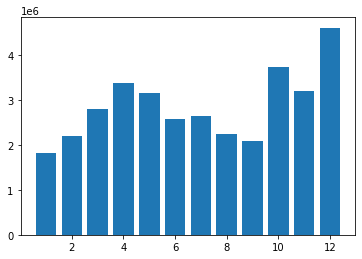

In [133]:
import matplotlib.pyplot as plt
plt.bar(range(1,13),df_sales_by_month["Sales Amount"])

## Question 2: What US city had heighest number of sales 

In [134]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1


In [135]:
df["City"]=df["Purchase Address"].apply(lambda x: x.split(",")[1])
df["City"]

0                Boston
1              Portland
2         San Francisco
3           Los Angeles
4                Austin
              ...      
25112     San Francisco
25113       Los Angeles
25114           Seattle
25115            Dallas
25116       Los Angeles
Name: City, Length: 185950, dtype: object

In [136]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month,City
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1,Boston
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1,Portland
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1,San Francisco
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1,Los Angeles
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1,Austin


In [137]:
df_sales_by_city=df[['City','Sales Amount']].groupby("City").agg({"Sales Amount":"sum"})
df_sales_by_city

,Sales Amount
City,
Atlanta,2795498.5800
Austin,1819581.7500
Boston,3661642.0100
Dallas,2767975.4000
Los Angeles,5452570.8000
New York City,4664317.4300
Portland,2320490.6100
San Francisco,8262203.9100
Seattle,2747755.4800


In [138]:
df_sales_by_city.index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='City')

<BarContainer object of 9 artists>

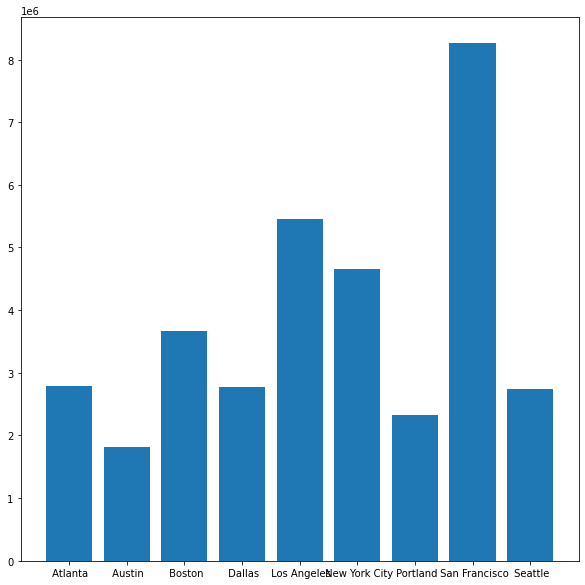

In [139]:

plt.figure(figsize=(10,10))
plt.bar(df_sales_by_city.index,df_sales_by_city["Sales Amount"])

## Question 3: What time should be display advertisement to maxilmize the likelyhood of customer's buying products?

In [140]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month,City
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1,Boston
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1,Portland
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1,San Francisco
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1,Los Angeles
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1,Austin


In [141]:
#Get order hour and minute
df["Order Hour"]=pd.DatetimeIndex(df['Order Date']).hour
df["Order Minute"]=pd.DatetimeIndex(df['Order Date']).minute

In [142]:
sales_by_hour=df[['Order Hour','Sales Amount']].groupby("Order Hour").agg({"Sales Amount":"sum"})
sales_by_hour

,Sales Amount
Order Hour,
0,713721.2700
1,460866.8800
2,234851.4400
3,145757.8900
4,162661.0100
5,230679.8200
6,448113.0000
7,744854.1200
8,1192348.9700


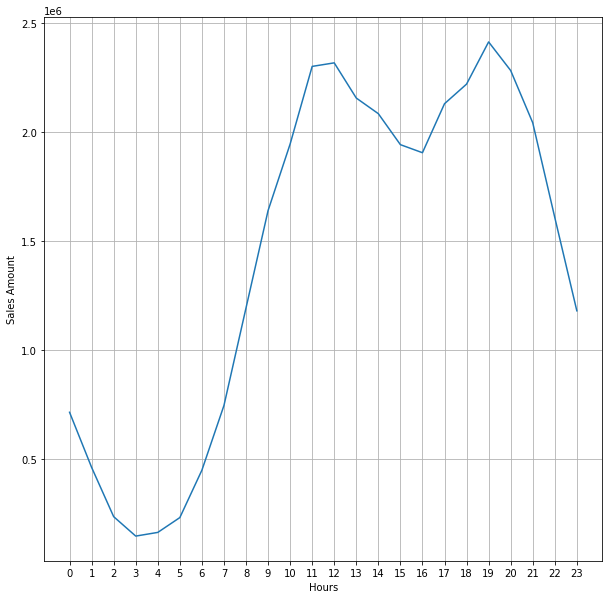

In [143]:
plt.figure(figsize=(10,10))
plt.xticks(sales_by_hour.index)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Sales Amount")
plt.plot(sales_by_hour.index,sales_by_hour["Sales Amount"])


## Question 4: What products are most often sold together? 

In [144]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month,City,Order Hour,Order Minute
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1,Boston,21,25
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1,Portland,14,15
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1,Los Angeles,20,33
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1,Austin,11,59


In [145]:
#Getting related colums only
df1=df[['Order ID','Product']]

In [146]:
#Making copy of existing dataset
df2=df1.copy()
df2.head()

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


In [147]:
#Doing self-join
self_joined_dataset = df1.merge(df2, how='inner', on='Order ID')
self_joined_dataset.head(50)

,Order ID,Product_x,Product_y
0,141234,iPhone,iPhone
1,141235,Lightning Charging Cable,Lightning Charging Cable
2,141236,Wired Headphones,Wired Headphones
3,141237,27in FHD Monitor,27in FHD Monitor
4,141238,Wired Headphones,Wired Headphones
5,141239,AAA Batteries (4-pack),AAA Batteries (4-pack)
6,141240,27in 4K Gaming Monitor,27in 4K Gaming Monitor
7,141241,USB-C Charging Cable,USB-C Charging Cable
8,141242,Bose SoundSport Headphones,Bose SoundSport Headphones
9,141243,Apple Airpods Headphones,Apple Airpods Headphones


In [148]:
self_joined_dataset.shape

(201770, 3)

In [149]:
#Removing self join with same product id
self_joined_dataset= self_joined_dataset[self_joined_dataset.Product_x != self_joined_dataset.Product_y	]
self_joined_dataset.head(50)

,Order ID,Product_x,Product_y
42,141275,USB-C Charging Cable,Wired Headphones
43,141275,Wired Headphones,USB-C Charging Cable
60,141290,Apple Airpods Headphones,AA Batteries (4-pack)
61,141290,AA Batteries (4-pack),Apple Airpods Headphones
138,141365,Vareebadd Phone,Wired Headphones
139,141365,Wired Headphones,Vareebadd Phone
160,141384,Google Phone,USB-C Charging Cable
161,141384,USB-C Charging Cable,Google Phone
229,141450,Google Phone,Bose SoundSport Headphones
230,141450,Bose SoundSport Headphones,Google Phone


In [150]:
self_joined_dataset.drop_duplicates()
self_joined_dataset.shape

(15198, 3)

In [151]:
# There are records like 
#   Order ID	  Product_x	                  Product_y
#42	141275	    USB-C Charging Cable	      Wired Headphones
#43	141275	    Wired Headphones	          USB-C Charging Cable
# Hence removing duplicate records 
self_joined_dataset_without_duplicate=self_joined_dataset[self_joined_dataset.Product_x < self_joined_dataset.Product_y]
self_joined_dataset_without_duplicate.head(50)

,Order ID,Product_x,Product_y
42,141275,USB-C Charging Cable,Wired Headphones
61,141290,AA Batteries (4-pack),Apple Airpods Headphones
138,141365,Vareebadd Phone,Wired Headphones
160,141384,Google Phone,USB-C Charging Cable
230,141450,Bose SoundSport Headphones,Google Phone
240,141457,Apple Airpods Headphones,iPhone
264,141478,Apple Airpods Headphones,Google Phone
340,141550,Apple Airpods Headphones,iPhone
342,141550,Apple Airpods Headphones,Wired Headphones
343,141550,Wired Headphones,iPhone


In [152]:
# Testing if duplicate worked correctly or not
print("*** Prior to removing duplicates ***********")
print(self_joined_dataset[self_joined_dataset['Order ID']=='141550'])
print("\n\n*** Post removing duplicates ***********")
print(self_joined_dataset_without_duplicate[self_joined_dataset_without_duplicate['Order ID']=='141550'])

*** Prior to removing duplicates ***********
    Order ID                 Product_x                 Product_y
338   141550                    iPhone  Apple Airpods Headphones
339   141550                    iPhone          Wired Headphones
340   141550  Apple Airpods Headphones                    iPhone
342   141550  Apple Airpods Headphones          Wired Headphones
343   141550          Wired Headphones                    iPhone
344   141550          Wired Headphones  Apple Airpods Headphones


*** Post removing duplicates ***********
    Order ID                 Product_x         Product_y
340   141550  Apple Airpods Headphones            iPhone
342   141550  Apple Airpods Headphones  Wired Headphones
343   141550          Wired Headphones            iPhone


In [153]:
# Getting count of most items bought together
Ordered_together_count=self_joined_dataset_without_duplicate.groupby(['Product_x','Product_y']).count()
Ordered_together_count.head()

Order ID
Product_x    Product_y                       
20in Monitor 27in 4K Gaming Monitor         2
             27in FHD Monitor               5
             34in Ultrawide Monitor         2
             AA Batteries (4-pack)         16
             AAA Batteries (4-pack)        11

In [154]:
Ordered_together_count.sort_values(by=['Order ID'],ascending=False).head()

,,Order ID
Product_x,Product_y,
Lightning Charging Cable,iPhone,1015
Google Phone,USB-C Charging Cable,999
Wired Headphones,iPhone,462
Google Phone,Wired Headphones,423
Apple Airpods Headphones,iPhone,373


## Question 5: What product sold the most? And why do you thin it was sold the most?

In [155]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Order Month,City,Order Hour,Order Minute
0,141234,iPhone,1,700.0000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0000,1,Boston,21,25
1,141235,Lightning Charging Cable,1,14.9500,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.9500,1,Portland,14,15
2,141236,Wired Headphones,2,11.9900,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.9800,1,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.9900,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.9900,1,Los Angeles,20,33
4,141238,Wired Headphones,1,11.9900,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.9900,1,Austin,11,59


In [164]:
Product_Quantity_Sold= df.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'})
Product_Quantity_Sold.columns=['Quantity','Mean Price']
Product_Quantity_Sold.head()

,Quantity,Mean Price
Product,,
20in Monitor,4129,109.9900
27in 4K Gaming Monitor,6244,389.9900
27in FHD Monitor,7550,149.9900
34in Ultrawide Monitor,6199,379.9900
AA Batteries (4-pack),27635,3.8400


([<matplotlib.axis.XTick at 0x7f4faffff990>,
 <a list of 19 Text major ticklabel objects>)

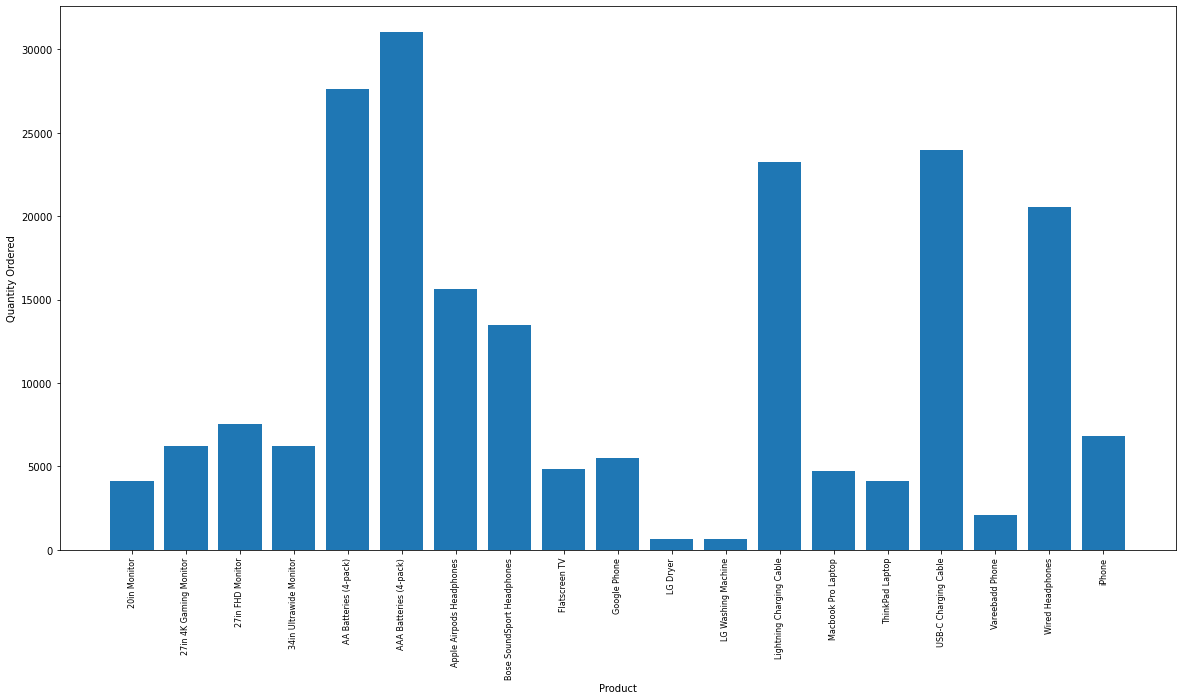

In [169]:
plt.figure(figsize=(20,10))
plt.bar(Product_Quantity_Sold.index,Product_Quantity_Sold['Quantity'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(Product_Quantity_Sold.index, rotation='vertical', size=8)


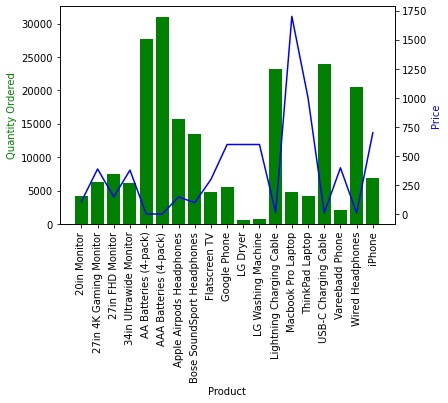

In [175]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product_Quantity_Sold.index, Product_Quantity_Sold['Quantity'],color='green')
ax2.plot(Product_Quantity_Sold.index, Product_Quantity_Sold['Mean Price'], 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(Product_Quantity_Sold.index, rotation='vertical')

plt.show()